# Machine Learning Engineer Nanodegree

## Reinforcement Learning

## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the Smartcab and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a 'Question X' header. Carefully read each question and provide thorough answers in the following text boxes that begin with 'Answer:'. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in agent.py.

**Note:** Code and Markdown cells can be executed using the Shift + Enter keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a Smartcab through its environment towards a goal. Since the Smartcab is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety and Reliability**. A driving agent that gets the Smartcab to its destination while running red lights or narrowly avoiding accidents would be considered unsafe. Similarly, a driving agent that frequently fails to reach the destination in time would be considered unreliable. Maximizing the driving agent's **safety and reliability** would ensure that Smartcabs have a permanent place in the transportation industry.

**Safety and Reliability** are measured using a letter-grade system as follows:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#aabcfe;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#aabcfe;color:#669;background-color:#e8edff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#aabcfe;color:#039;background-color:#b9c9fe;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-amwm">Grade</th>
    <th class="tg-amwm">Safety</th>
    <th class="tg-amwm">Reliability</th>
  </tr>
  <tr>
    <td class="tg-baqh">A+</td>
    <td class="tg-baqh">Agent commits no traffic violations,and always chooses the correct action.</td>
    <td class="tg-baqh">Agent reaches the destination in timefor 100% of trips.</td>
  </tr>
  <tr>
    <td class="tg-baqh">A</td>
    <td class="tg-baqh">Agent commits few minor traffic violations,such as failing to move on a green light.</td>
    <td class="tg-baqh">Agent reaches the destination on timefor at least 90% of trips.</td>
  </tr>
  <tr>
    <td class="tg-baqh">B</td>
    <td class="tg-baqh">Agent commits frequent minor traffic violations,such as failing to move on a green light.</td>
    <td class="tg-baqh">Agent reaches the destination on timefor at least 80% of trips.</td>
  </tr>
  <tr>
    <td class="tg-baqh">C</td>
    <td class="tg-baqh">Agent commits at least one major traffic violation,such as driving through a red light.</td>
    <td class="tg-baqh">Agent reaches the destination on timefor at least 70% of trips.</td>
  </tr>
  <tr>
    <td class="tg-baqh">D</td>
    <td class="tg-baqh">Agent causes at least one minor accident,such as turning left on green with oncoming traffic.</td>
    <td class="tg-baqh">Agent reaches the destination on timefor at least 60% of trips.</td>
  </tr>
  <tr>
    <td class="tg-baqh">F</td>
    <td class="tg-baqh">Agent causes at least one major accident,such as driving through a red light with cross-traffic.</td>
    <td class="tg-baqh">Agent fails to reach the destination on timefor at least 60% of trips.</td>
  </tr>
</table>

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

## Understand the World

Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the Smartcab and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the agent.py agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), **the white vehicle** is the Smartcab.

# Question 1

In a few sentences, describe what you observe during the simulation when running the default agent.py agent code. Some things you could consider:

- Does the Smartcab move at all during the simulation?
- What kind of rewards is the driving agent receiving?
- How does the light changing color affect the rewards?

**Hint:** From the /smartcab/ top-level directory (where this notebook is located), run the command

**'python smartcab/agent.py'**

# Answer 1

- The Smartcab doesn't move during all simulation. Another cars (the real world) moves.
- Receives two kind of reward. On positive (in green color) also simulation indicates the agent is in Idle mode at a red light. Another negative (in red color) when simulation indicates there was a green light with not oncoming traffic.
- Green light rewards negative when Smartcab its not moving. As the Smartcab is not moving, only received a positive reward when light is in red, meaning the car should stop.



# Understand the Code

In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the "hidden" devices that make everything work. In the /smartcab/ top-level directory, there are two folders: /logs/ (which will be used later) and /smartcab/. Open the /smartcab/ folder and explore each Python file included, then answer the following question.

# Question 2

- In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.
- In the environment.py Python file, what Environment class function is called when an agent performs an action?
- In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?
- In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?

# Answer 2

From this code in agent.py I identified three flags, I'll describe below the code.

       # Set parameters of the learning agent
        self.learning = learning # Whether the agent is expected to learn
        self.Q = dict()          # Create a Q-table which will be a dictionary of tuples
        self.epsilon = epsilon   # Random exploration factor
        self.alpha = alpha       # Learning factor

- **learning:** Used to enabled when the agent is expected to learn.
- **epsilon:** Used as factor that weigh the random exploration. 
- **alpha:** Used as factor that weigh the learning.

Reviewing this part of the code in enviroment.py, I can understand the class function called when n agent performs an action **(class: act)**:

    def act(self, agent, action):
        """ Consider an action and perform the action if it is legal.
            Receive a reward for the agent based on traffic laws. """
            

**Understanding the difference between 'render_text()' function and the 'render()' function in simulator.py file:** Based on the reviewing of the code below, I can understand that ´render_text()´ is used for prompt on the command line:

    def render_text(self, trial, testing=False):
        """ This is the non-GUI render display of the simulation. 
            Simulated trial data will be rendered in the terminal/command prompt. """

And based on code below, its clar that **'render()' function is used to provide the graphical GUI of the simulation**

    def render(self, trial, testing=False):
        """ This is the GUI render display of the simulation. 
            Supplementary trial data can be found from render_text. """

Reviewing the file planner.py, looking for the function "next_waypoint(), its seen that **the fuction consider the direction East-West first**, as showed below:

    def next_waypoint(self):
        """ Creates the next waypoint based on current heading, location,
            intended destination and L1 distance from destination. """

        # Collect global location details
        
        # Calculate true difference in location based on world-wrap
        
        # This will pre-determine the need for U-turns from improper headings
        
        # First check if destination is at location
        
        # Next check if destination is cardinally East or West of location    
        elif dx != 0:

            if dx * heading[0] > 0:  # Heading the correct East or West direction
                return 'forward'
            elif dx * heading[0] < 0 and heading[0] < 0: # Heading West, destination East
                if dy > 0: # Destination also to the South
                    return 'left'
                else:
                    return 'right'
            elif dx * heading[0] < 0 and heading[0] > 0: # Heading East, destination West
                if dy < 0: # Destination also to the North
                    return 'left'
                else:
                    return 'right'
            elif dx * heading[1] > 0: # Heading North destination West; Heading South destination East
                return 'left'
            else:
                return 'right'

        # Finally, check if destination is cardinally North or South of location

## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of None, (do nothing) 'left' (turn left), right' (turn right), or 'forward' (go forward). For your first implementation, navigate to the 'choose_action()' agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as 'self.learning' and 'self.valid_actions'. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results

To obtain results from the initial simulation, you will need to adjust following flags:

- 'enforce_deadline' - Set this to True to force the driving agent to capture whether it reaches the destination in time.
- 'update_delay' - Set this to a small value (such as 0.01) to reduce the time between steps in each trial.
- 'log_metrics' - Set this to True to log the simluation results as a .csv file in /logs/.
- 'n_test' - Set this to '10' to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the 'display' flag to False. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded! Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

# Question 3

Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:

- How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?
- Given that the agent is driving randomly, does the rate of reliability make sense?
- What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?
- As the number of trials increases, does the outcome of results change significantly?
- Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?

# Answer 3

- Based on inspection of 10-Trial Rolling relative Frequency of Bad Actions, a maximum around 45% of decision was bad decision, happens in trial 18. This bad actions caused arond 5% of major accident and around 6% of minor accident.
- Based on inspection of 10-Trial Rolling Rate of Reliability, was around 12% from trial number 10 to 12, then reduced to 0% since trial 13. We could consider this is because the agent has no learning, reliability is very low, as expected.
- Based on inspection of 10-Trial Rolling Average Reward per action, we can conclude that the agent was receiving negative rewards in all trials, so I consider was penalized enough.
- After number of trials finished, the outcome of rating is the worst possible (F and F), thats why using this agent, can not be safe or reliable for passengers, because has the worst rating (F) for safety and reliability. **Considering the agent is not learning, the expected results are not going to be enough good even we increases the number of trials for the simulation. In the graph we can observe that even the number of trial increases, the outcome results doesn't change. I mean for 10-Trial Rolling relative Frequency of Bad Actions, keeps a flat trend during all trials for every bad action (violation or accident). Also for Reliability, we can see that it's very flat even decrease from trial 12 to 18. The same for reward for action, keep a flat trend below level of zero. So outcome didn't change even trial was increased.**

## Inform the Driving Agent

The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually learn what action it should take when occupying a state. The condition of 'if state then action' for each state is called a policy, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States

Inspecting the *'build_state()'* agent function shows that the driving agent is given the following data from the environment:

- 'waypoint', which is the direction the Smartcab should drive leading to the destination, relative to the Smartcab's heading.
- 'inputs', which is the sensor data from the Smartcab. It includes
    - 'light', the color of the light.
    - 'left', the intended direction of travel for a vehicle to the Smartcab's left. Returns None if no vehicle is present.
    - 'right', the intended direction of travel for a vehicle to the Smartcab's right. Returns None if no vehicle is present.
    - 'oncoming', the intended direction of travel for a vehicle across the intersection from the Smartcab. Returns None if no vehicle is present.
- 'deadline', which is the number of actions remaining for the Smartcab to reach the destination before running out of time.

# Question 4

*Which features available to the agent are most relevant for learning both **safety and efficiency**? Why are these features appropriate for modeling the Smartcab in the environment? If you did not choose some features, why are those features not appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.*

# Answer 4

From my point of view, feature inputs, specially **input (light)** is the most important for safety, because can avoid accident. For efficiency, the feature **waypoint** should be the most important, because can represent a biggest effort to achieve the target if not are taken into consideration. Another feature I want to add is **input (oncoming)** because is key to improve efficiency to know when the intended direction.

The "input (right)", meaning the intended direction of travel for a vehicle to the right of Smartcab, has not importance for for some countries like USA, where the right line traffic will never interfer with the cab direction.

**The "input (left)", meaning the intended direction of travel for a vehicle from the left of smartcab is important to be considered because is needed to evaluate if a car is comming from the left in the event of light is in red and car can decide to go right. This may increase security avoiding collisions.**

Another interesting feature to consider is "deadline", this is needed for efficiency and must to be considered in rewards, but not for taken this from the enviroment like an input to build_state() function. **If I include this  feature the agent learning can be negatively influenced, especially if it is running out of time, because the state space can be rewarding actions to move faster to target location even more than another for safety, and this is abad influence for the agent. Also based on the appropiate learning, the agent should look to move to target location as soon as possible.**

## Define a State Space

When defining a set of states that the agent can occupy, it is necessary to consider the size of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for every state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the Smartcab:

('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day').

How frequently would the agent occupy a state like (False, True, True, True, False, False, '3AM')? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

# Question 5

If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?

**Hint:** Consider the combinations of features to calculate the total number of states!

# Answer 5

From question 4, I selected only two features: Input (light) and waypoint. Considering the combination of possible states, we defined a total states as follow:

- input(light) has 2 variables:c'red', 'green'
- **Input(left) has 4 variables: left', 'right', 'forward', 'none'**
- Waypoint has 3 variables: 'forward', 'left', 'right'
- Oncoming has 4 variables: 'left', 'right', 'forward', 'none'

**So calculating how much states we have, is "2 x 4 x 3 x 4" = 96 states**

96 states is a very low state space for a Q learning algorithm. I expect to analyze results and consider adding anothers features in the future if is needed.

Considering to run a Monte Carlo simulation in order of make some estimation of how many steps are neccesary to analyze every single state of the 96 states defined:

In [9]:
from sets import Set
from random import choice

def chance_of_visiting_all_states(iterations, k, n=24):
    r = range(n)
    total = 0
    for i in range(iterations):
        s = Set()
        for j in range(k):
            s.add(choice(r))
            if len(s) == n:
                total +=1
                break
    return float(total)/iterations

steps = 900
print "Chance of visiting all states in {st} steps: {ch}".format(st = steps, ch = chance_of_visiting_all_states(2000, steps, 96))

Chance of visiting all states in 900 steps: 0.989


Running the same code above for differents steps, I got:

- Chance of visiting all states in 750 steps: 96.65%
- Chance of visiting all states in 500 steps: 59.8%
- Chance of visiting all states in 900 steps: 98.9%

## Update the Driving Agent State

For your second implementation, navigate to the 'build_state()' agent function. With the justification you've provided in Question 4, you will now set the 'state' variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

¨**Note**: Remember to reset simulation flags to their default setting when making this observation!

# Implement a Q-Learning Driving Agent

The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the best action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a decaying, $\epsilon$-greedy Q-learning algorithm with no discount factor. Follow the implementation instructions under each TODO in the agent functions.

Note that the agent attribute self.Q is a dictionary: This is how the Q-table will be formed. Each state will be a key of the self.Q dictionary, and each value will then be another dictionary that holds the action and Q-value. Here is an example:

Furthermore, note that you are expected to use a decaying $\epsilon$ (exploration) factor. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

## Q-Learning Simulation Results

To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:

- 'enforce_deadline' - Set this to True to force the driving agent to capture whether it reaches the destination in time.
- 'update_delay' - Set this to a small value (such as 0.01) to reduce the time between steps in each trial.
- 'log_metrics' - Set this to True to log the simluation results as a .csv file and the Q-table as a .txt file in /logs/.
- 'n_test' - Set this to '10' to perform 10 testing trials.
- 'learning' - Set this to 'True' to tell the driving agent to use your Q-Learning implementation.


In addition, use the following decay function for $\epsilon$:

![equation](math.svg)

If you have difficulty getting your implementation to work, try setting the 'verbose' flag to True to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

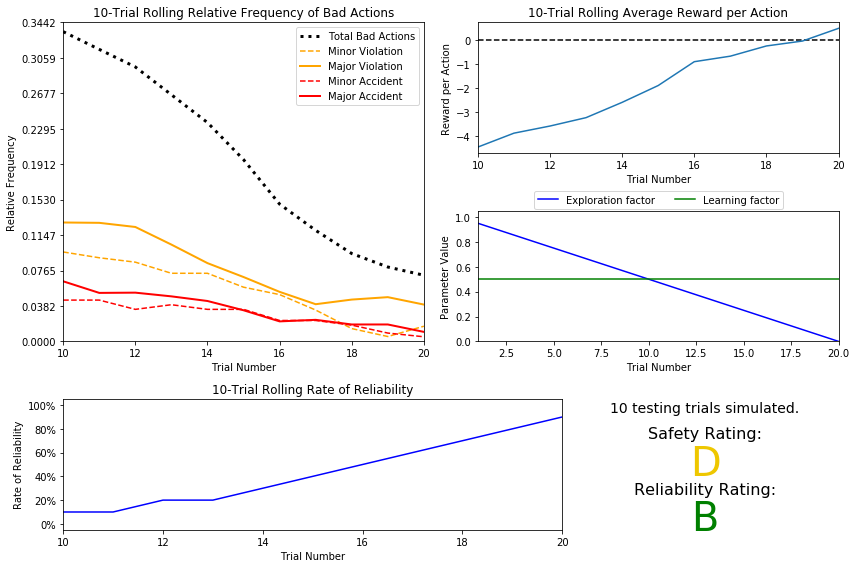

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

# Question 6

Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in Question 3. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:

- Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?
- Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?
- Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?
- As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?
- How does the safety and reliability rating compare to the initial driving agent?

# Answer 6

- Based on inspection of 10-Trial Rolling relative Frequency of Bad Actions, a maximum around 33% of decision was bad decision, happens in trial 10, then reduced in every trial until close around 8%. This bad actions caused arond 6.8% of major accident in trial 10 and improved during each trial. This is a clear improvement after activated the Q-Learning agent compared with no learning agent.
- Based on inspection of 10-Trial Rolling Rate of Reliability, starts around 12% from trial number 10, and increases until to close around 82% in a linea trend. It´s looks like if we made more trial, the results can be even better, so the agent is already learning.
- Based on inspection of 10-Trial Rolling Average Reward per action, we can conclude that the agent was receiving negative rewards in the begining but improved in all trials, even that rewards remains negative during most of run finish positive in the last trial. 
- The driving agent required 20 trials before testing. Considering the epsilon tolerance was 0.05 (the default), makes sense.
- Comparing with the basic driving agent, the safety rating was better (D) and Reliability Rating also was better(B). This has sense considering now the agent is learning.


## Improve the Q-Learning Driving Agent

The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety and efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to transition from experimenting with unlearned behavior to acting on learned behavior. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it learn, but never let it act. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results

To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:

- 'enforce_deadline' - Set this to True to force the driving agent to capture whether it reaches the destination in time.
- 'update_delay' - Set this to a small value (such as 0.01) to reduce the time between steps in each trial.
- 'log_metrics' - Set this to True to log the simluation results as a .csv file and the Q-table as a .txt file in /logs/.
- 'learning' - Set this to 'True' to tell the driving agent to use your Q-Learning implementation.
- 'optimized' - Set this to 'True' to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:

- 'n_test' - Set this to some positive number (previously 10) to perform that many testing trials.
- 'alpha' - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- 'epsilon' - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- 'tolerance' - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay** to 'tolerance' **at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

![equation2](math2.svg)

You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the 'verbose' flag to True to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

Scenario 1: epsilon stars in 1.0, then decay function e = 1/t(exp(2), alpha=1.0, tolerance=0.04, n=20


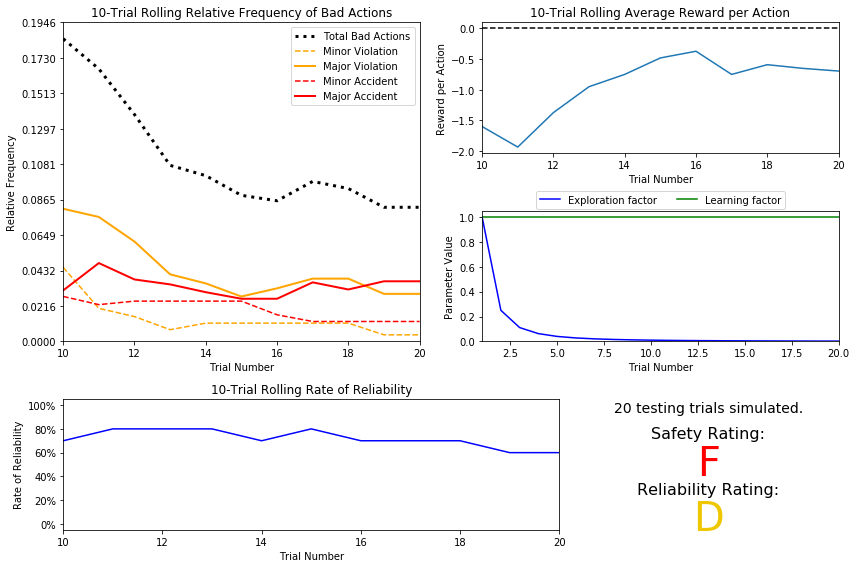

In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 1: epsilon stars in 1.0, then decay function e = 1/t(exp(2), alpha=1.0, tolerance=0.04, n=20")
vs.plot_trials('sim_improved-learning.csv')

Scenario 2: epsilon stars in 1.0, then decay function e = 1/(t(exp(2)+alpha*t), alpha=1.0, tolerance=0.03, n=20


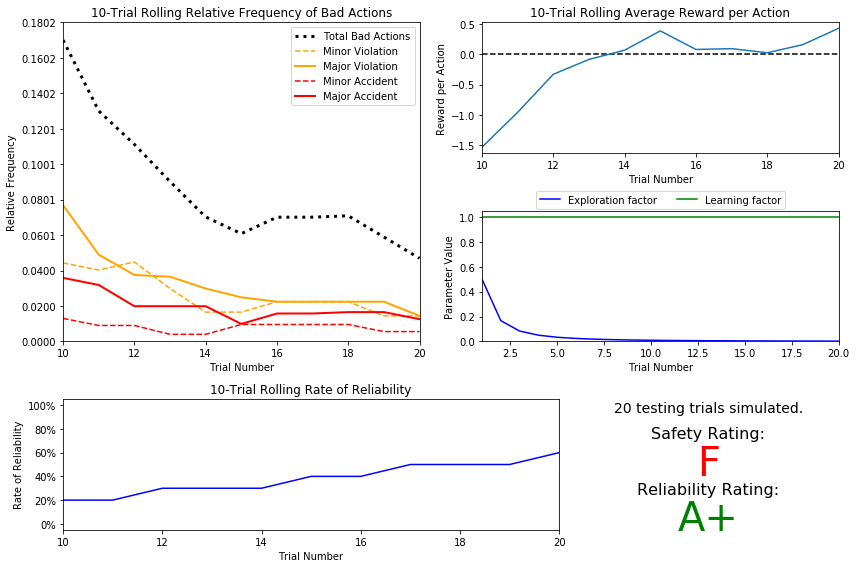

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 2: epsilon stars in 1.0, then decay function e = 1/(t(exp(2)+alpha*t), alpha=1.0, tolerance=0.03, n=20")
vs.plot_trials('sim_improved-learning.csv')

Scenario 3: epsilon stars in 1.0, then decay function e = 1/(t(exp(2)+alpha*t), alpha=1.0, tolerance=0.01, n=20


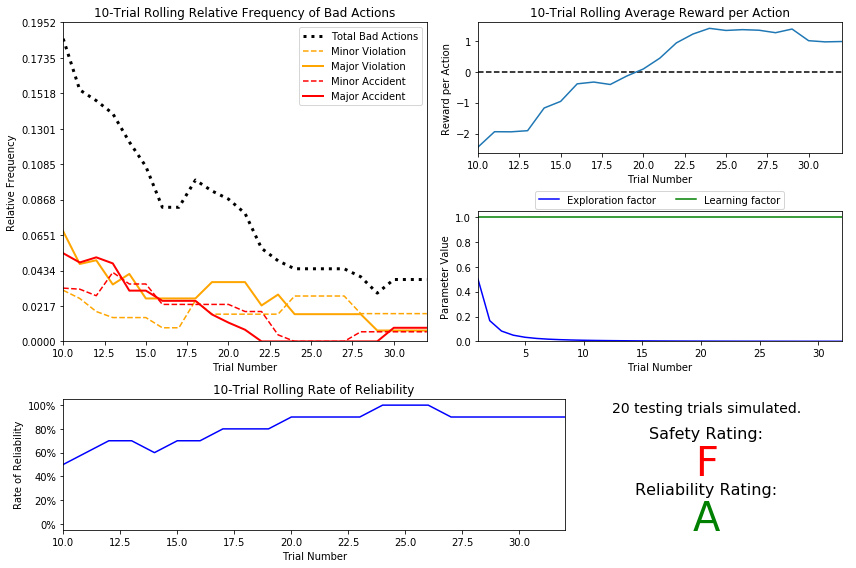

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 3: epsilon stars in 1.0, then decay function e = 1/(t(exp(2)+alpha*t), alpha=1.0, tolerance=0.01, n=20")
vs.plot_trials('sim_improved-learning.csv')

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 4: epsilon stars in 1.0, then decay function e = 1/(t(exp(2)+alpha*t), alpha=0.9, tolerance=0.001, n=100")
vs.plot_trials('sim_improved-learning.csv')

Scenario 4: epsilon stars in 1.0, then decay function e = 1/(t(exp(2)+alpha*t), alpha=0.9, tolerance=0.001, n=100


In [10]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 5: epsilon stars in 1.0, decay function self.epsilon = self.alpha**self.t, alpha=0.9, tolerance=0.001, n=100")
)
vs.plot_trials('sim_improved-learning.csv')

Scenario 5: epsilon stars in 1.0, then decay function self.epsilon = self.alpha**self.t, alpha=0.9, tolerance=0.001, n=100


Scenario 6: self.epsilon = math.fabs(math.cos(self.t)), alpha=0.95, tolerance=0.01, n=100


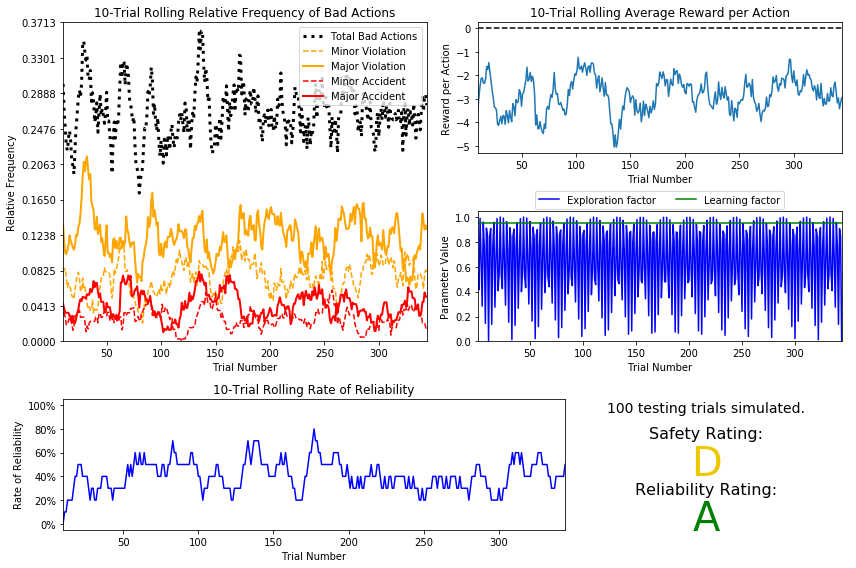

In [15]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 6: self.epsilon = math.fabs(math.cos(self.t)), alpha=0.95, tolerance=0.01, n=100")
vs.plot_trials('sim_improved-learning.csv')

Scenario 7: epsilon stars in 1.0, then decay function e = self.epsilon = math.fabs(math.cos(self.alpha*self.t), alpha=0.95, tolerance=0.01, n=100


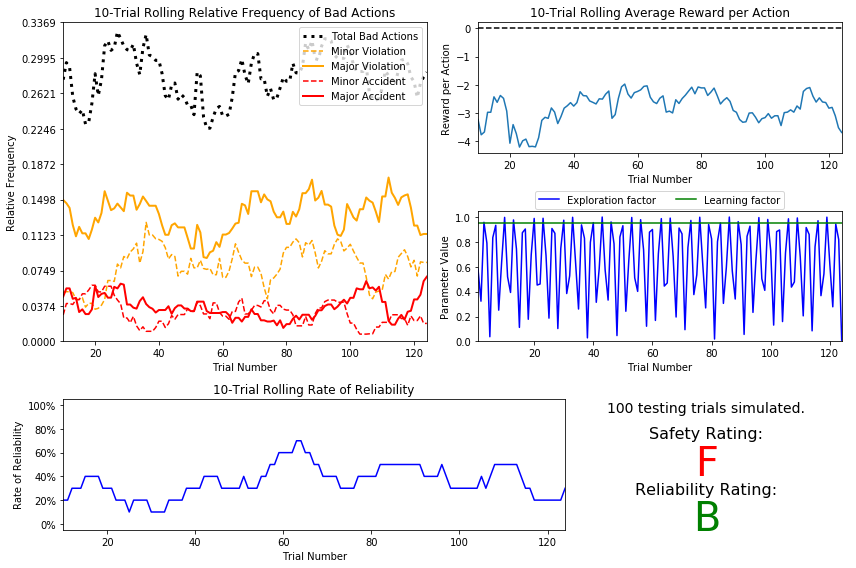

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 7: epsilon stars in 1.0, then decay function e = self.epsilon = math.fabs(math.cos(self.alpha*self.t), alpha=0.95, tolerance=0.01, n=100")
vs.plot_trials('sim_improved-learning.csv')

In [17]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 8: epsilon stars in 1.0, self.epsilon = self.alpha**self.t, alpha=0.95, tolerance=0.0001 and increasing n=500")
vs.plot_trials('sim_improved-learning.csv')

Scenario 8: epsilon stars in 1.0, self.epsilon = self.alpha**self.t, alpha=0.95, tolerance=0.0001 and increasing n=500


Scenario 9: epsilon stars in 1.0, then decay function e = self.epsilon = self.alpha**self.t, alpha=0.99, tolerance=0.00001, n=1000


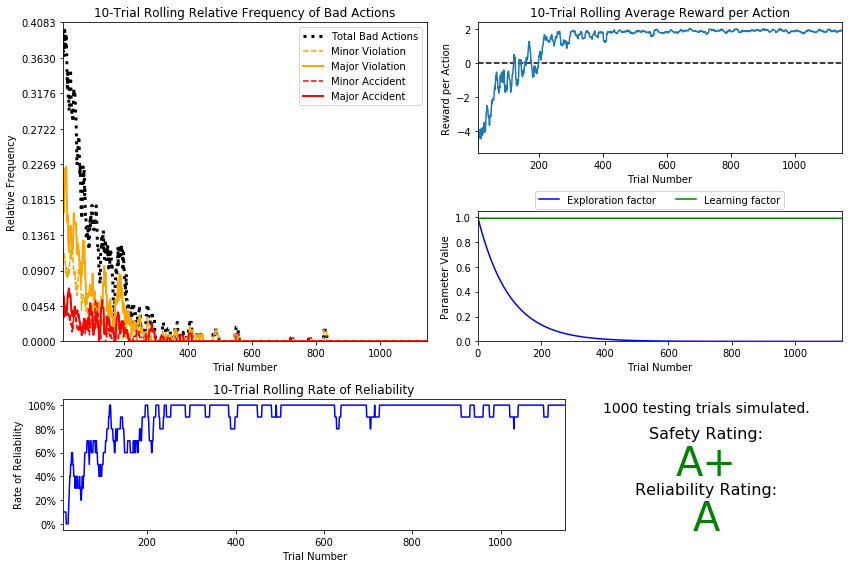

In [18]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("Scenario 9: epsilon stars in 1.0, then decay function e = self.epsilon = self.alpha**self.t, alpha=0.99, tolerance=0.00001, n=1000")
vs.plot_trials('sim_improved-learning.csv')

# Question 7

Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:

- What decaying function was used for epsilon (the exploration factor)?
- Approximately how many training trials were needed for your agent before begining testing?
- What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?
- How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?
- Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?
- Are you satisfied with the safety and reliability ratings of the Smartcab?

# Answer 7

I use different function for exploration factor, with different trial for every scenario. The detailed configuration for every scenario tested was described above.

Comparing the results from Q-learner optimized with the previous Q-learner default, I achieve an improvement from D to A+ in safety and from B to A in efficiency, for the optimal scenario of test, scenario 9. 

In the best scenario, I achieved 100% percent of realiability, using:

- **decay self.epsilon = self.alpha(exp(self.t))**
- **alpha=0.99**
- **epsilon tolerance=0.00001**
- **n=1000**

I used this as results of several test, I understood that to increase the training trial, I need to decrease epsilon tolerance and also put a high alpha value. Also I realized that as few states variables is used, its more easy to achieve a good result for learning. Even that, its very important to guarantee the needed features in states definition, this really can avoid issues in the real life. Before I didn't consider input(left), then I realized this is necesary to guarantee security in some state.

I can say the Q-learner results show my driving agent successfully learned an appropriate policy. Also I am satisfied with the safety and reliability rating.

**Reviewing about the alpha=0.99 configuration** Alpha factor, is used determinate how much the newly acquired information will override the old information. If this is very close to 1, this would make the agent consider only the most recent information. In fully deterministic environments, a learning rate of 1 is optimal. Setting a high value such as 0.9 means that learning can occur quickly.

**References:**

https://en.wikipedia.org/wiki/Q-learning#Learning_rate 

http://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html 

http://www.jmlr.org/papers/volume5/evendar03a/evendar03a.pdf


## Define an Optimal Policy

Sometimes, the answer to the important question "what am I trying to get my agent to learn?" only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the Smartcab is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the policy your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

# Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? You can explain with words or a table, but you should thoroughly discuss the optimal policy.

2. Next, investigate the 'sim_improved-learning.txt' text file to see the results of your improved Q-Learning algorithm. For each state that has been recorded from the simulation, is the policy (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did not learn the optimal policy. Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your state dictionary below, it should be easy for the reader to understand what each state represents.

# Answer 8

Summarizing the optimal policy, explaining the best set of instructions possible regarding the enviroment for the US right-of-way traffic laws, and looking to achieve the target:



**Respect for the laws:** 

- If the light is red, the car must to stop. If the light is green, can move foward.
- If the light is red and if the waypoint is right and there is no incoming traffic from left, can go right. 
- If need to turn to left, review incoming traffic and allow the movement only if they are not some incoming traffic. If movement its not possible, wait until no incoming traffic is coming.

**Looking the target:** 

- If the light is green, move to go in the direction of the waypoint.
- If waypoint is backward, move to go left or right when its allowed by law.



Investigating "sim_improved-learning.txt" file, it's possible to analyze for each state if the policy is correct, also looking for states where the policy taken is different for optimal policy. Remember the features selected: **Input(light), waypoint, oncoming, input(left).**

**('green', 'forward', 'right', 'left')
 -- forward : 2.81
 -- right : 0.00
 -- None : 0.00
 -- left : -20.86**
 

Been the light in green, its ok to move foward, so was positive rewarded even more considering the waypoint forward. Its ok don't reward move right or do nothing, and also penalize to move left considering there is traffic coming from left.  **This is a correct policy** because is resulting on move forward.

**('red', 'forward', 'forward', 'left')
 -- forward : -10.85
 -- right : 0.41
 -- None : 0.90
 -- left : 0.00**
 
Been the light in red, moving foward must to be negative rewarded and also because is traffic coming from left, the car must to avoid to go to right. In this state, the agent is rewarding positive to do nothing and few positive to move right.Considering the security risk of moving right and that the agent still rewards positive.  **This is a correct policy**, because is resulting in do nothing.

**('red', 'forward', 'right', 'forward')
 -- forward : 0.00
 -- right : -19.16
 -- None : 1.70
 -- left : 0.00**

Been the light in red, moving forward to waypoint its not possible, so it's ok don't reward to do that. Also because there is traffic moving forward on the left, it's ok don't reward to move to left and penalize try to move to right. Also do nothing  can be positive rewarded because in the next light change, the car can follow waypoint. **This is a correct policy** because is resulting in do nothing.

**('green', 'left', 'left', 'right')
 -- forward : 0.33
 -- right : -0.39
 -- None : -4.52
 -- left : 0.00**

Been the light in green, moving forward can be positive rewarded. Going right or do nothing its ok to reward negative. But moving left should be positive rewarding because waypoint is on the left and oncoming traffic is left. So this is not efficient transition from agent.  **This is a not correct policy** because is not resulting in moving left.

**('green', 'right', 'left', 'right')
 -- forward : 0.75
 -- right : 1.82
 -- None : -4.33
 -- left : 0.00**

Been the light in green, moving forward can be positive rewarded. Going right considering waypoint is right, is rewarded positive. Do nothing its ok to reward negative because the car must to move to right and can do it. Also moving to left is ok don't reward because that movement is not efficient to look the waypoint.  **This is a correct policy** because is resulting in moving right.


## Optional: Future Rewards - Discount Factor, 'gamma'

Curiously, as part of the Q-Learning algorithm, you were asked to not use the discount factor, 'gamma' in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

# Optional Question 9

There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the Smartcab itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?

# Answer 9

- Considering from enviroment that the target location is randomly selected in every test, has not sense to try to propagate positive reward based on the current state. The enviroment is changing in every state, so there is not value of considering learning from previously states.
- From smartcab decision, we are only considering the possible states in an intersection without not more location information. Been rewarded for achiving goal in the future has not any positive effect on the learning process for the agent.  
